# PROBLEM STATEMENT

You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decide that a Linear Regression model might be a good candidate to solve this problem.  
Data set:
- Independant variable X: Outside Air Temperature
- Dependant variable Y: Overall daily revenue generated in dollars 

# STEP 1: LIBRARIES IMPORT


In [1]:
import pandas as pd #DataFrame manipulation
import numpy as np   #Numerical analysis
import matplotlib.pyplot as plt   #Data visualisation
import seaborn as sns    #Advanced matplotlib 
%matplotlib inline

# STEP 2: IMPORT DATASET

In [2]:
IceCream = pd.read_csv("IceCreamData.csv")

In [3]:
IceCream.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
IceCream.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [5]:
IceCream.describe()     #Statistical summary

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [6]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# STEP 3: VISUALIZE DATASET

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


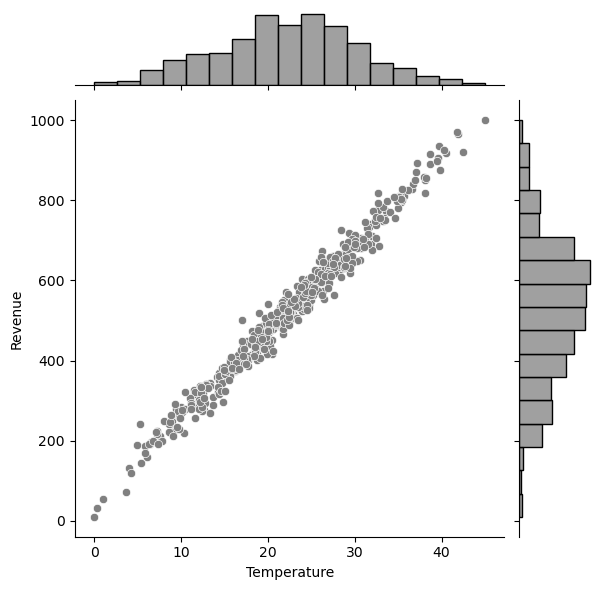

In [7]:
sns.jointplot(x='Temperature', y='Revenue', data = IceCream, color = 'gray')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


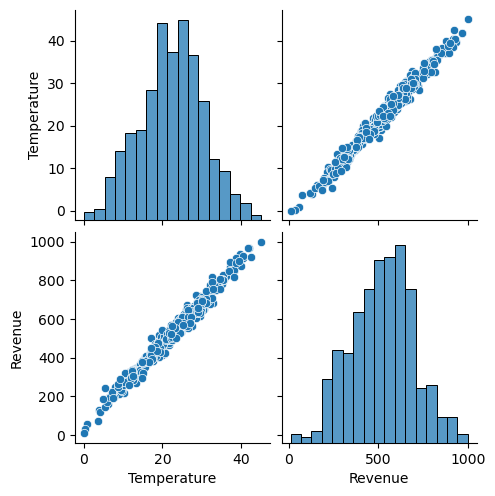

In [8]:
sns.pairplot(IceCream)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


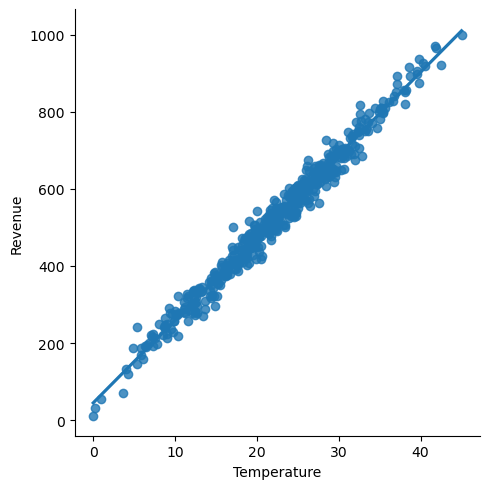

In [9]:
sns.lmplot(x='Temperature', y='Revenue', data=IceCream)

# STEP 4: CREATE TESTING AND TRAINING DATASET

In [10]:
y = IceCream['Revenue']

In [11]:
X = IceCream[['Temperature']]

In [12]:
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# STEP 5: TRAIN THE MODEL

In [15]:
X_train.shape

(375, 1)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regressor = LinearRegression(fit_intercept = True) #Instatiate an object, to assume there is b(slope)

In [18]:
regressor.fit(X_train,y_train)

LinearRegression()

In [19]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [21.26860281]
Linear Model Coefficient (b):  49.784456791545836


# STEP 6: TEST THE MODEL 

In [20]:
X_test.shape

(125, 1)

In [21]:
y_predict = regressor.predict( X_test)
y_predict

array([524.3099277 , 295.85461265, 398.71760027, 724.80566276,
       740.26902319, 495.31730807, 480.41721341,  49.78445679,
       307.62402662, 242.77231844, 461.61167687, 494.22635083,
       401.90410339, 540.82680731, 605.45310718, 334.02472542,
       444.91509543, 559.90425656, 612.46769316, 739.08376203,
       723.34972013, 681.55092743, 339.55872548, 389.91933653,
       269.41233076, 236.82699301, 449.1100904 , 416.92693066,
       506.80794999, 366.62224519, 630.89208762, 424.89745951,
       453.57473382, 872.20309669, 487.8184577 , 470.3742402 ,
       636.22280173, 640.63686714, 630.68979428, 576.79225245,
       593.11145103, 485.25957871, 591.03296555, 599.91693113,
       676.43802061, 782.95933127, 363.27410537, 763.37625524,
       441.97710189, 271.98023231, 664.4511556 , 426.026713  ,
       626.54088709, 830.39688529, 681.85577393, 650.89538232,
       475.50498585, 214.5158675 , 457.54706651, 521.72445679,
       355.23188281, 532.12574385, 397.84397178, 938.10

In [22]:
y_test

315    520.392405
61     321.848273
158    390.403349
38     740.935685
306    759.377432
          ...    
481    691.855484
377    278.731962
138    507.356810
442    615.175384
104    627.901841
Name: Revenue, Length: 125, dtype: float64

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand Train dataset')

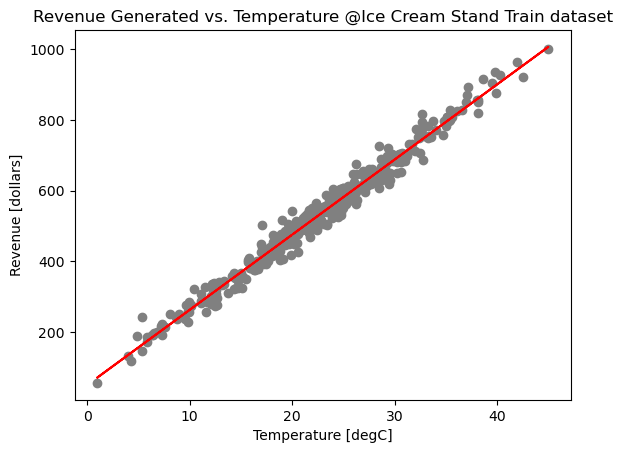

In [23]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand Train dataset')

Text(0.5, 1.0, 'Revenue Generated vs. Hours @Ice Cream Stand Test dataset')

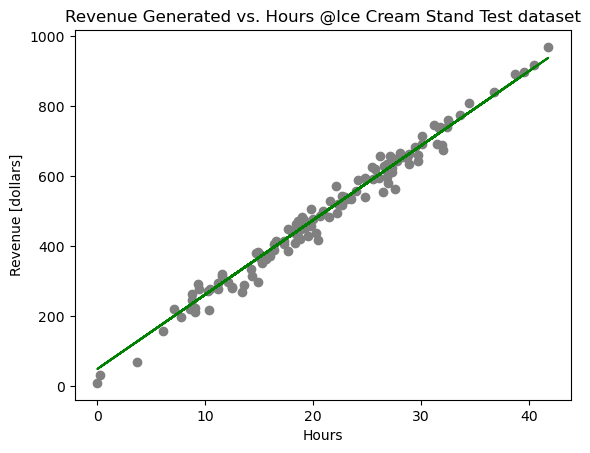

In [24]:
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'green')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Hours')
plt.title('Revenue Generated vs. Hours @Ice Cream Stand Test dataset')

In [ ]:
y_predict = regressor.predict(10)
y_predict